<a href="https://colab.research.google.com/github/prakher2pratyush/dimension_reduction/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Load MINST Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['label']
for i in range(0,784) :
  column_names.append('pixel'+str(i))

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/MNIST_train.csv', names = column_names)

print(data.head())
print(data.shape)

class_label = data['label']
print(class_label.head())
print(class_label.shape)

d = data.drop('label', axis = 1)
print(d.head())
print(d.shape)

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      6       0       0       0  ...         0         0         0         0
1      5       0       0       0  ...         0         0         0         0
2      7       0       0       0  ...         0         0         0         0
3      9       0       0       0  ...         0         0         0         0
4      5       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
(20000, 785)
0    6
1    5
2    7
3    9
4    5
Name: label, dtype: int64
(20000,)
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0     

##Sanity Check

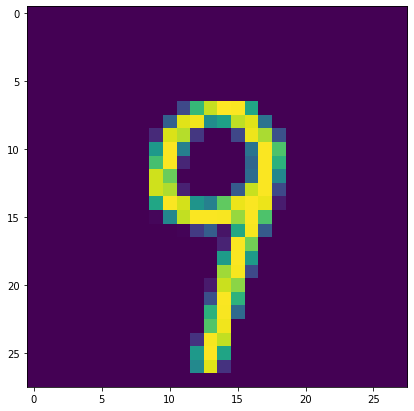

9

In [ ]:
plt.figure(figsize = (7,7))

grid_data = d.iloc[1300].to_numpy().reshape(28,28)
plt.imshow(grid_data)
plt.show()

class_label[1300]

##Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)


## PCA

(19999, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


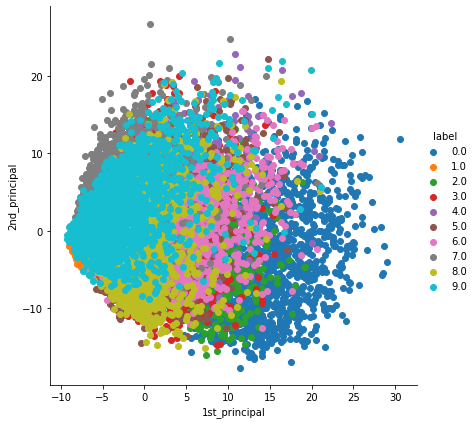

In [ ]:
from sklearn import decomposition
import seaborn as sns

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

print(pca_data.shape)

pca_data = np.vstack((pca_data.T, class_label)).T

pca_df = pd.DataFrame(data = pca_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


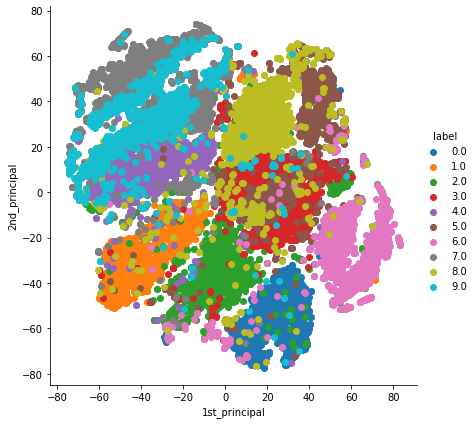

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0, perplexity = 30, n_iter = 1000)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, class_label)).T

tsne_df = pd.DataFrame(data = tsne_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(tsne_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


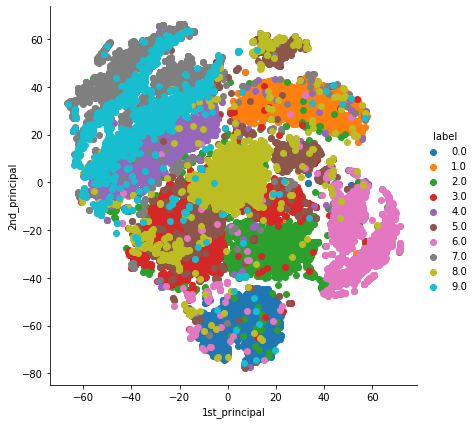

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 1000)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, class_label)).T

tsne_df = pd.DataFrame(data = tsne_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(tsne_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


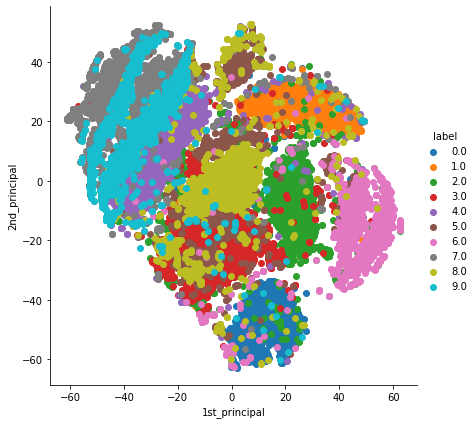

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 100, n_iter = 1000)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, class_label)).T

tsne_df = pd.DataFrame(data = tsne_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(tsne_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


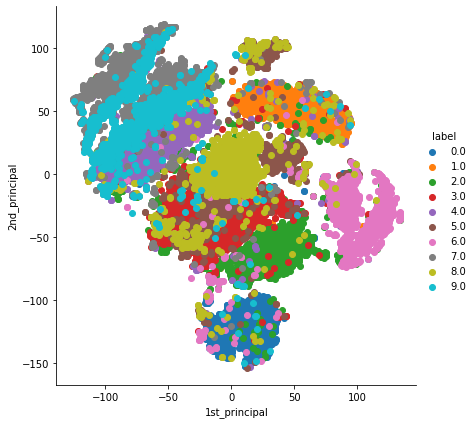

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, class_label)).T

tsne_df = pd.DataFrame(data = tsne_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(tsne_df, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()